### Multiple Linear Regression

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
df_index = pd.read_csv('economic_index.csv')

In [15]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [16]:
## drop unnnecesarry columns
df_index.drop(columns=['Unnamed: 0','month','year'],axis=1,inplace=True)

In [17]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [18]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [19]:
## Visualization
import seaborn as sns

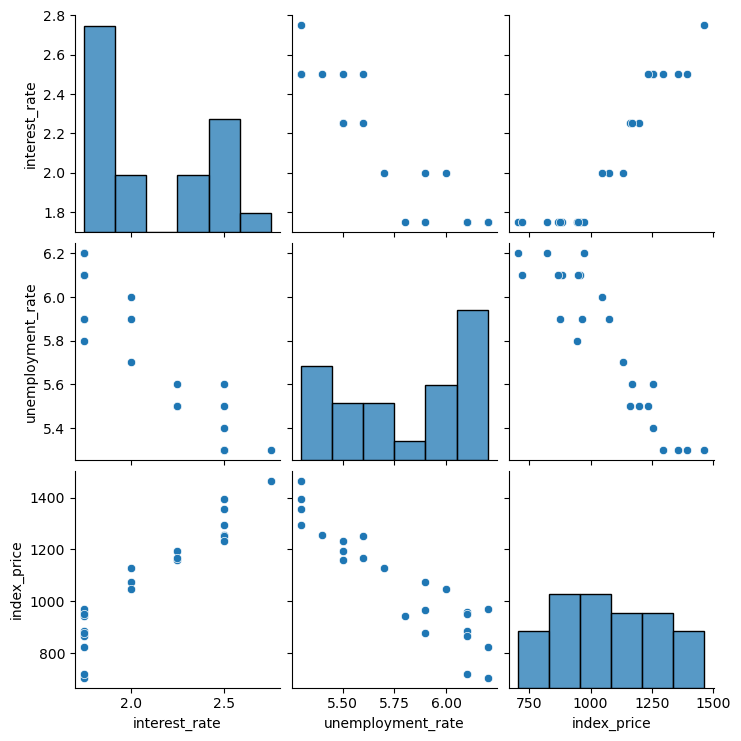

In [20]:
sns.pairplot(df_index)

In [21]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


index_rate proportional to index_price and inversely to unemployment_rate

unemployment_rate inversely proportional to interest_rate and index_price

Text(0, 0.5, 'interest rate')

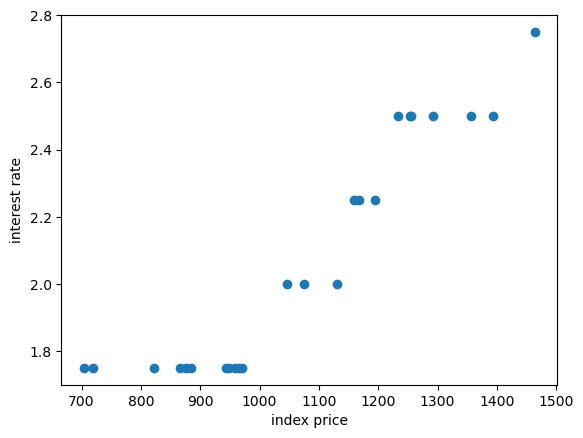

In [27]:
## visualize
plt.scatter(df_index['index_price'],df_index['interest_rate'])
plt.xlabel('index price')
plt.ylabel('interest rate')


Text(0, 0.5, 'unemployment rate')

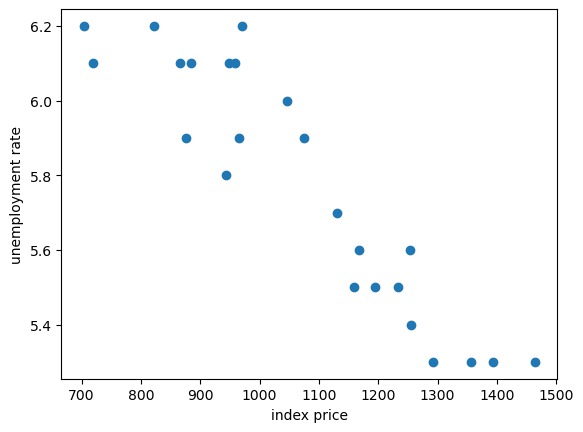

In [28]:
plt.scatter(df_index['index_price'],df_index['unemployment_rate'])
plt.xlabel('index price')
plt.ylabel('unemployment rate')

In [32]:
### Independent Feature and Dependent Feature
# X = df_index[['unemployment_rate','interest_rate']]
X = df_index.iloc[:,:-1]

In [33]:
X.shape

(24, 2)

In [34]:
# y = df_index['index_price']
y = df_index.iloc[:,-1]

In [36]:
y.shape

(24,)

In [42]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [44]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

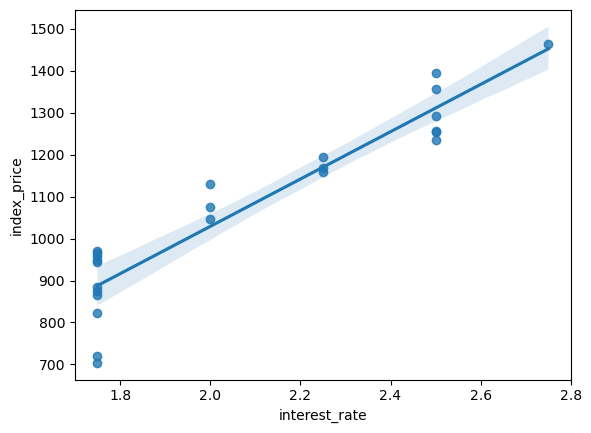

In [49]:
sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

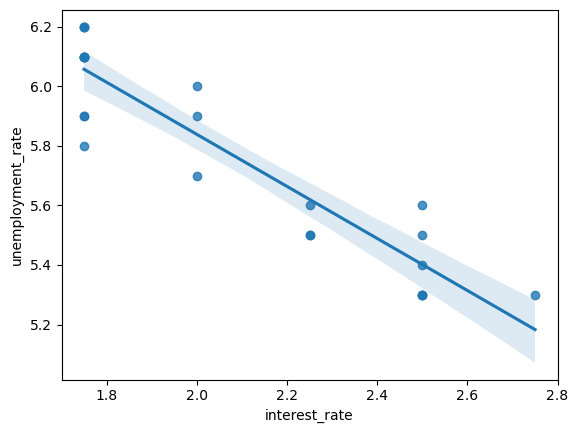

In [50]:
sns.regplot(x=df_index['interest_rate'],y=df_index['unemployment_rate'])

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

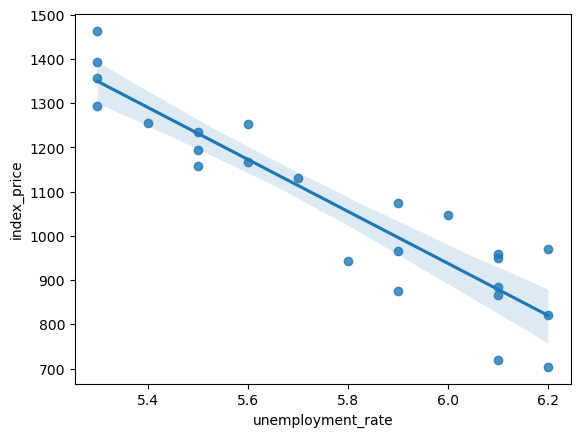

In [51]:
sns.regplot(x=df_index['unemployment_rate'],y=df_index['index_price'])

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [53]:
X_train=scaler.fit_transform(X_train)

In [56]:
X_test = scaler.fit_transform(X_test)

In [66]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [67]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [68]:
reg.fit(X_train,y_train)

LinearRegression()

In [88]:
reg.coef_

array([  88.27275507, -116.25716066])

In [89]:
reg.intercept_

1053.4444444444443

In [69]:
## cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(reg,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [70]:
validation_score.mean()

-5914.828180162388

In [71]:
## Prediction
y_pred = reg.predict(X_test)

In [72]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [73]:
### Performance Metircs
from sklearn.metrics import mean_absolute_error, mean_squared_error

from math import sqrt


mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = sqrt(mse)

In [75]:
print("MSE: ",mse)
print("MAE: ",mae)
print("RMSE: ",rmse)

MSE:  8108.567426306604
MAE:  73.80444932337097
RMSE:  90.04758423359621


In [76]:
## R Square
from sklearn.metrics import r2_score
r2_score = r2_score(y_test,y_pred)

In [77]:
r2_score

0.7591371539010257

In [78]:
## Adjusted R Square
1 - (1-r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5985619231683761

### Assumptions

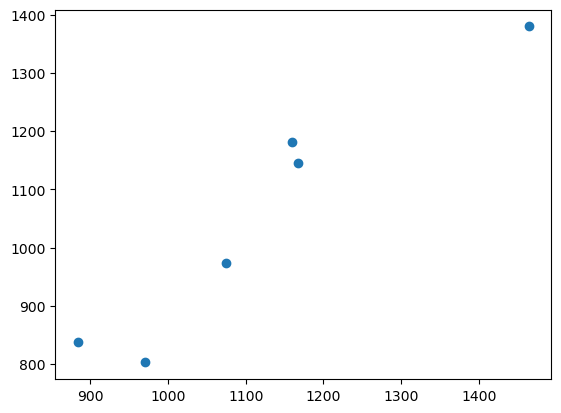

In [79]:
plt.scatter(y_test,y_pred)

In [81]:
residuals = y_test - y_pred
residuals

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64

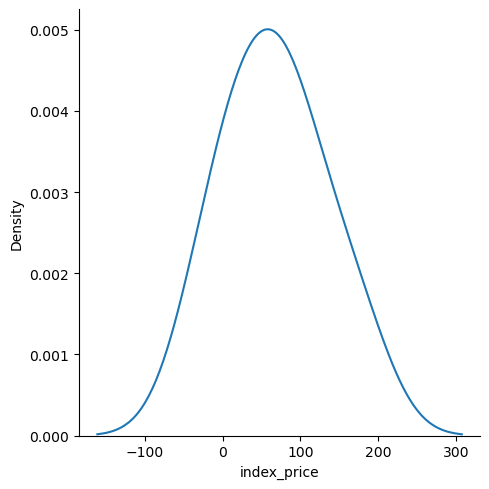

In [84]:
## Plot residuals

sns.displot(residuals,kind='kde')

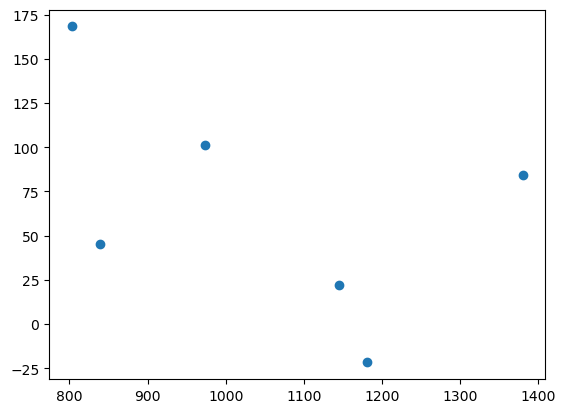

In [85]:
## scatter plot with precdictions and residuals
plt.scatter(y_pred,residuals)

In [86]:
### OlS Linear Regression
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()

In [87]:
model.summary()

c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Thu, 24 Jul 2025   Prob (F-statistic):                       0.754
Time:                        14:08:40   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
reg.coef_

array([  88.27275507, -116.25716066])